In [1]:
#importing dependencies

import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Loading CSV

# df = pd.read_csv(os.path.join("../Resources", "perth_house_prices.csv"))

df = pd.read_csv(os.path.join("https://test-bucket-las-001.s3.ap-southeast-2.amazonaws.com/perth_house_prices.csv"))


df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [3]:
#Selecting Columns of interest

df = df[["BUILD_YEAR","BEDROOMS","BATHROOMS","LAND_AREA","FLOOR_AREA","CBD_DIST","NEAREST_SCH_RANK","LONGITUDE","LATITUDE","PRICE"]]
df

,BUILD_YEAR,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_SCH_RANK,LONGITUDE,LATITUDE,PRICE
0,2003.0,4,2,600,160,18300,NaN,115.842450,-32.115900,565000
1,2013.0,3,2,351,139,26900,129.0,115.859554,-32.193470,365000
2,1979.0,3,1,719,86,22600,113.0,115.993579,-32.120578,287000
3,1953.0,2,1,651,59,17900,NaN,116.038009,-31.900547,255000
4,1998.0,4,1,466,131,11200,NaN,115.947780,-31.885790,325000
...,...,...,...,...,...,...,...,...,...,...
33651,2013.0,4,3,292,245,16100,49.0,115.751820,-32.064580,1040000
33652,NaN,3,2,228,114,9600,35.0,115.841403,-31.867055,410000
33653,NaN,3,2,261,112,9600,35.0,115.841418,-31.866890,427000
33654,1974.0,3,1,457,85,12600,NaN,115.842410,-31.839680,295000


In [4]:
#Deleting all empty rows
df = df.dropna()
df

,BUILD_YEAR,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_SCH_RANK,LONGITUDE,LATITUDE,PRICE
1,2013.0,3,2,351,139,26900,129.0,115.859554,-32.193470,365000
2,1979.0,3,1,719,86,22600,113.0,115.993579,-32.120578,287000
9,1999.0,3,2,552,126,5900,29.0,115.907050,-31.917880,685000
11,2003.0,3,2,398,158,36300,39.0,115.702200,-31.654280,367500
13,2002.0,4,2,704,247,23100,129.0,115.849480,-32.159590,535000
...,...,...,...,...,...,...,...,...,...,...
33646,2009.0,4,3,414,277,9400,24.0,115.765149,-31.981771,1700000
33648,2011.0,3,2,248,108,24900,129.0,115.858357,-32.176013,423000
33649,2014.0,4,2,400,132,17100,53.0,116.013543,-31.872192,467000
33650,1997.0,3,2,200,127,16000,128.0,115.756070,-32.066410,955000


In [5]:
# Prepocessing data

X = df[["BUILD_YEAR","BEDROOMS","BATHROOMS","LAND_AREA","FLOOR_AREA","CBD_DIST","LONGITUDE","LATITUDE","NEAREST_SCH_RANK"]]
y = df["PRICE"].values.reshape(-1,1)
print(X.shape, y.shape)

(20692, 9) (20692, 1)


In [ ]:
# # Creting a copy of data
# data = X.copy()

In [ ]:
# # Creating dummies for SUBURB column

# data_binary_encoded = pd.get_dummies(data, columns = ["SUBURB"])
# data_binary_encoded

In [ ]:
# data = X.copy()

# data_binary_encoded = pd.get_dummies(X)
# data_binary_encoded.head()

In [6]:
# Splitting data into training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
# Scaling data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
# Transforming Data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [9]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [10]:
# Finding model accuracy using R^2 score

model.score(X_test_scaled, y_test_scaled)

0.6076353517992334

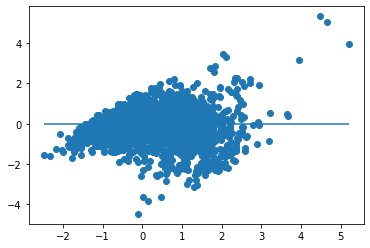

In [11]:
predictions = model.predict(X_test_scaled)

plt.scatter(predictions,predictions - y_test_scaled)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
